In [18]:
import os

In [19]:
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [21]:
print(len(os.listdir('flowers/daisy')))
print(len(os.listdir('flowers/dandelion')))
print(len(os.listdir('flowers/rose')))
print(len(os.listdir('flowers/sunflower')))
print(len(os.listdir('flowers/tulip')))

847
1092
858
780
1018


In [22]:
try:
    flower_set_dir = 'flowers_class'
    
    training_dir = os.path.join(flower_set_dir, 'training')
    testing_dir = os.path.join(flower_set_dir, 'testing')
    
    train_daisy_dir = os.path.join(training_dir, 'daisy')
    test_daisy_dir = os.path.join(testing_dir, 'daisy')
    
    train_dandelion_dir = os.path.join(training_dir, 'dandelion')
    test_dandelion_dir = os.path.join(testing_dir, 'dandelion')
    
    train_rose_dir = os.path.join(training_dir, 'rose')
    test_rose_dir = os.path.join(testing_dir, 'rose')
    
    train_sunflower_dir = os.path.join(training_dir, 'sunflower')
    test_sunflower_dir = os.path.join(testing_dir, 'sunflower')
    
    train_tulip_dir = os.path.join(training_dir, 'tulip')
    test_tulip_dir = os.path.join(testing_dir, 'tulip')
except OSError:
    pass

In [23]:
try:
    os.mkdir(flower_set_dir)
    
    os.mkdir(training_dir)
    os.mkdir(testing_dir)
    
    os.mkdir(train_daisy_dir)
    os.mkdir(test_daisy_dir)
    
    os.mkdir(train_dandelion_dir)
    os.mkdir(test_dandelion_dir)
    
    os.mkdir(train_rose_dir)
    os.mkdir(test_rose_dir)
    
    os.mkdir(train_sunflower_dir)
    os.mkdir(test_sunflower_dir)
    
    os.mkdir(train_tulip_dir)
    os.mkdir(test_tulip_dir)
except OSError:
    pass

In [24]:
def delete_files(source):
    image_list = os.listdir(source)
    
    for x in image_list:
        source_dir = os.path.join(source, x)
        os.unlink(source_dir)

In [25]:
def split_data(source, training, testing, split_size):
    image_list = os.listdir(source)
    
    list_size = len(image_list)
    train_num = int(list_size * split_size)
    
    shuffled_image_list = random.sample(image_list, list_size)
    
    delete_files(training)
    delete_files(testing)
    
    counter = 0
    for x in shuffled_image_list:
        source_dir = os.path.join(source, x)
        
        if (counter < train_num):
            destination_dir = os.path.join(training, x)
        else:
            destination_dir = os.path.join(testing, x)
            
        shutil.copyfile(source_dir, destination_dir)
        
        counter += 1

In [26]:
split_size = 0.9

daisy_source_dir = 'flowers/daisy'
dandelion_source_dir = 'flowers/dandelion'
rose_source_dir = 'flowers/rose'
sunflower_source_dir = 'flowers/sunflower'
tulip_source_dir = 'flowers/tulip'

split_data(daisy_source_dir, train_daisy_dir, test_daisy_dir, split_size)
split_data(dandelion_source_dir, train_dandelion_dir, test_dandelion_dir, split_size)
split_data(rose_source_dir, train_rose_dir, test_rose_dir, split_size)
split_data(sunflower_source_dir, train_sunflower_dir, test_sunflower_dir, split_size)
split_data(tulip_source_dir, train_tulip_dir, test_tulip_dir, split_size)

In [27]:
print(len(os.listdir(train_daisy_dir)))
print(len(os.listdir(test_daisy_dir)))
print('\n')

print(len(os.listdir(train_dandelion_dir)))
print(len(os.listdir(test_dandelion_dir)))
print('\n')

print(len(os.listdir(train_rose_dir)))
print(len(os.listdir(test_rose_dir)))
print('\n')

print(len(os.listdir(train_sunflower_dir)))
print(len(os.listdir(test_sunflower_dir)))
print('\n')

print(len(os.listdir(train_tulip_dir)))
print(len(os.listdir(test_tulip_dir)))


762
85


982
110


772
86


702
78


916
102


In [28]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [29]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense  (5, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

In [30]:


#model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
#    tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(1024, activation='relu'),
#    tf.keras.layers.Dense(5, activation='softmax')
#])

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy']
             )

In [31]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    testing_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 4120 images belonging to 5 classes.
Found 460 images belonging to 5 classes.


In [32]:
history = model.fit(
    train_generator,
    epochs = 13,
    verbose = 1,
    validation_data = validation_generator
)

Epoch 1/13
129/129 [==============================] - 171s 1s/step - loss: 5.4683 - accuracy: 0.6340 - val_loss: 0.5413 - val_accuracy: 0.8000
Epoch 2/13
129/129 [==============================] - 150s 1s/step - loss: 0.6249 - accuracy: 0.7813 - val_loss: 0.4874 - val_accuracy: 0.8152
Epoch 3/13
129/129 [==============================] - 148s 1s/step - loss: 0.5670 - accuracy: 0.8000 - val_loss: 0.3880 - val_accuracy: 0.8522
Epoch 4/13
129/129 [==============================] - 152s 1s/step - loss: 0.4774 - accuracy: 0.8260 - val_loss: 0.4176 - val_accuracy: 0.8413
Epoch 5/13
129/129 [==============================] - 147s 1s/step - loss: 0.4288 - accuracy: 0.8439 - val_loss: 0.5248 - val_accuracy: 0.8152
Epoch 6/13
129/129 [==============================] - 157s 1s/step - loss: 0.4686 - accuracy: 0.8386 - val_loss: 0.4751 - val_accuracy: 0.8435
Epoch 7/13
129/129 [==============================] - 156s 1s/step - loss: 0.4141 - accuracy: 0.8468 - val_loss: 0.4345 - val_accuracy: 0.8391

<Figure size 432x288 with 0 Axes>

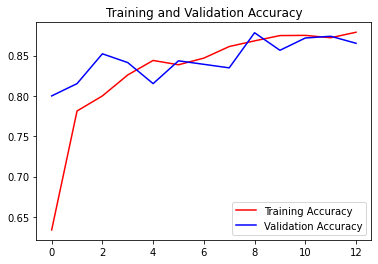

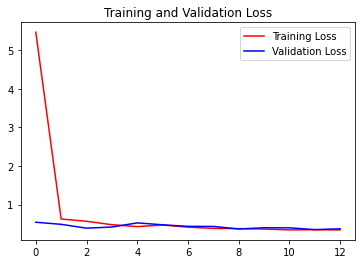

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()


In [48]:
model.save('flower_class_v2.h5')

In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np

path = 'Test/Dandelion/artem-beliaikin-yfXN1I5Ej1M-unsplash.jpg'

img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.
#
#images = np.vstack([x])
classes = model.predict(x)

result = np.argmax(classes[0])
print(classes[0])

switch = {
            0 : "daisy",
            1 : "dandelion",
            2 : "rose",
            3 : "sunflower",
            4 : "tulip"
         }


percent = round(classes[0][result] * 100, 2)
print('Predicted', switch.get(result), 'with', percent, '% confidence')

[9.0931955e-04 9.9838507e-01 1.8537101e-05 6.6939851e-05 6.2023214e-04]
dandelion with 99.84 % confidence
